In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# 서울면적 605.7 제곱킬로
# 대전면적 117 제곱킬로
# 서울시 한 구가 평균적으로 20-30 제곱킬로
# '구'당 대규모 점포수로만 비교했을 때 대전이 서울에 비해 확실히 부족. 최소 1/2-1/3 수준 

In [18]:
pd.set_option('display.max_columns', None)
rent_seoul = pd.read_csv('/home/subin/다운로드/팩터 논문/서울특별시_전월세가_2022.csv', encoding='cp949')
rent_seoul['제곱미터당 보증금(만원)'] = rent_seoul['보증금(만원)'] / rent_seoul['임대면적']
rent_seoul['제곱미터당 임대료(만원)'] = rent_seoul['임대료(만원)'] / rent_seoul['임대면적']
rent_seoul['임대료/보증금*100'] = rent_seoul['제곱미터당 임대료(만원)']/rent_seoul['제곱미터당 보증금(만원)']*100
rent_seoul['임대료/보증금*100'] = rent_seoul['임대료/보증금*100'].replace(np.inf, np.nan)
rent_seoul
# 서울특별시
# '임대료(만원)'이 '0'인 행 : 전세 데이터
# 전세 데이터로 cap rate 구하려면 금리 데이터 필요 -> 복잡해질 것을 우려하여, 월세 데이터에 충분한 양의 아파트 데이터가 있는지 확인

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,계약일,전월세구분,임대면적,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료,제곱미터당 보증금(만원),제곱미터당 임대료(만원),임대료/보증금*100
0,2022,11560,영등포구,12600,양평동2가,1.0,대지,1.0,3.0,6.0,20220101,전세,18.84,16000,0,힘멜하임,2014.0,오피스텔,22.01~24.01,신규,NaN,0.0,NaN,849.256900,0.000000,0.000000
1,2022,11560,영등포구,11800,도림동,NaN,NaN,NaN,NaN,NaN,20220101,월세,20.00,300,30,NaN,1986.0,단독다가구,NaN,NaN,NaN,NaN,NaN,15.000000,1.500000,10.000000
2,2022,11215,광진구,10700,화양동,1.0,대지,111.0,12.0,19.0,20220101,월세,27.82,10000,135,NaN,2021.0,오피스텔,22.01~24.01,신규,NaN,0.0,0.0,359.453630,4.852624,1.350000
3,2022,11620,관악구,10100,봉천동,NaN,NaN,NaN,NaN,NaN,20220101,월세,18.50,4000,40,NaN,2019.0,단독다가구,22.02~23.02,신규,NaN,0.0,0.0,216.216216,2.162162,1.000000
4,2022,11620,관악구,10100,봉천동,NaN,NaN,NaN,NaN,NaN,20220101,전세,14.00,13000,0,NaN,2019.0,단독다가구,22.01~24.01,신규,NaN,0.0,NaN,928.571429,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560660,2022,11230,동대문구,10200,용두동,NaN,NaN,NaN,NaN,NaN,20221231,월세,43.00,17000,25,NaN,2015.0,단독다가구,23.01~25.01,신규,NaN,0.0,0.0,395.348837,0.581395,0.147059
560661,2023,11560,영등포구,13200,신길동,NaN,NaN,NaN,NaN,NaN,20221231,월세,37.00,1000,33,NaN,1990.0,단독다가구,23.01~25.01,신규,NaN,0.0,0.0,27.027027,0.891892,3.300000
560662,2023,11530,구로구,10700,개봉동,NaN,NaN,NaN,NaN,NaN,20221231,전세,37.00,8500,0,NaN,1997.0,단독다가구,NaN,NaN,NaN,NaN,NaN,229.729730,0.000000,0.000000
560663,2023,11290,성북구,13300,정릉동,NaN,NaN,NaN,NaN,NaN,20221231,월세,63.57,5000,60,NaN,1997.0,단독다가구,NaN,NaN,NaN,NaN,NaN,78.653453,0.943841,1.200000


In [9]:
pd.set_option('display.max_rows', None)
rent_seoul.isnull().sum()

# 전체 데이터 수 560,665 (개)
# 본번, 부번이 없는 데이터 157,727 (개)
# 지번이 없는 데이터 157,944 (개)
# 건물명이 없는 데이터 157,760 (개)

# 결측치를 제외한다고 하면 약 30% 데이터 손실

접수년도            0
자치구코드           0
자치구명            0
법정동코드           0
법정동명            0
지번구분코드     157944
지번구분       157944
본번         157727
부번         157727
층          157899
계약일             0
전월세구분           0
임대면적            0
보증금(만원)         0
임대료(만원)         0
건물명        157760
건축년도         9097
건물용도            0
계약기간       151193
신규계약구분     141513
갱신청구권사용    489289
종전보증금      141514
종전임대료      354039
dtype: int64

In [19]:
rent_seoul_monthly = rent_seoul[rent_seoul['임대료(만원)']!=0]
rent_seoul_jeonsae = rent_seoul[rent_seoul['임대료(만원)']==0]

In [43]:
rent_seoul['건물용도'].value_counts()

아파트      219948
단독다가구    157899
연립다세대    121202
오피스텔      61616
Name: 건물용도, dtype: int64

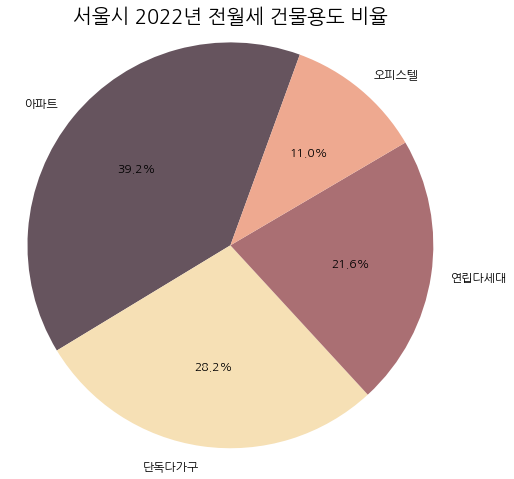

In [44]:
custom_order = ['아파트', '단독다가구', '연립다세대', '오피스텔']
value_counts = rent_seoul['건물용도'].value_counts().reindex(custom_order)

plt.figure(figsize=(8, 8)) 
custom_colors = ['#66545e', '#f6e0b5', '#aa6f73', '#eea990', '#a39193']
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=70, colors=custom_colors)

plt.title('서울시 2022년 전월세 건물용도 비율', fontsize=20)

plt.axis('equal')
plt.rc('font', family='NanumGothic')

plt.show()

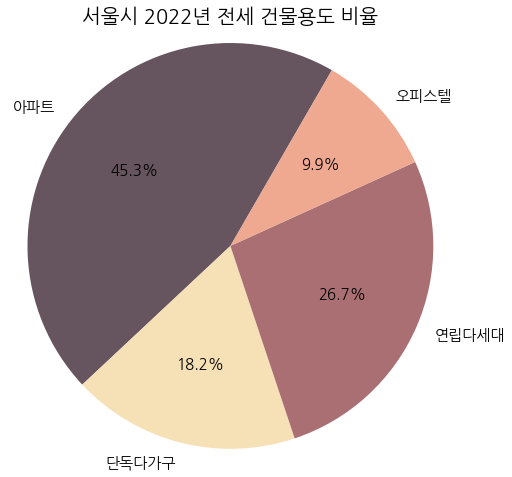

In [340]:
custom_order = ['아파트', '단독다가구', '연립다세대', '오피스텔']
value_counts = rent_seoul_jeonsae['건물용도'].value_counts().reindex(custom_order)

plt.figure(figsize=(8, 8))
custom_colors = ['#66545e', '#f6e0b5', '#aa6f73', '#eea990', '#a39193']
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=60, colors=custom_colors)

plt.title('서울시 2022년 전세 건물용도 비율', fontsize=20)

plt.axis('equal')
plt.rc('font', family='NanumGothic')

plt.show()

In [210]:
rent_seoul_jeonsae['건물용도'].value_counts()
# 확실히 아파트가 전세 데이터가 많으나 93,071개면 데이터 수 확보는 괜찮은 것으로 판단.
# 아파트 종류, 지역이 다른지 추가 확인 -> 이 정도 분포면 괜찮다고 판단(아래에서 확인)

아파트      126877
연립다세대     74652
단독다가구     50832
오피스텔      27655
Name: 건물용도, dtype: int64

In [211]:
rent_seoul_monthly['자치구명'].value_counts()

송파구    24329
관악구    21551
강남구    18664
강서구    15476
마포구    15245
       ...  
금천구     6140
강북구     5676
도봉구     5373
종로구     4198
중구      4106
Name: 자치구명, Length: 25, dtype: int64

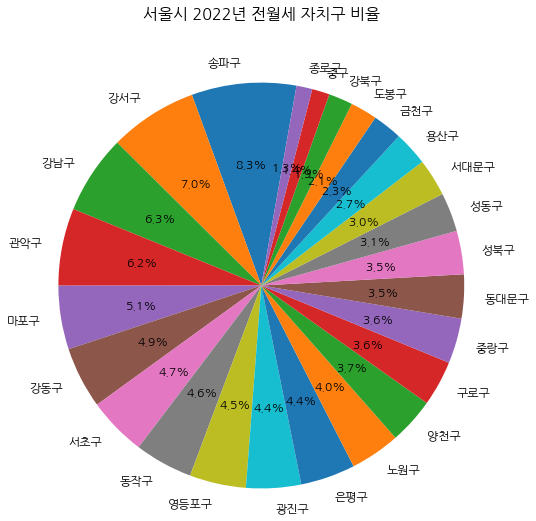

In [45]:
value_counts = rent_seoul['자치구명'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=80)
plt.title('서울시 2022년 전월세 자치구 비율', fontsize=16, y=1.1)
plt.rc('font', size=12)
plt.axis('equal')

plt.show()

In [212]:
rent_seoul_monthly['건물명'].value_counts()

센트레빌레우스1단지       1326
헬리오시티             737
파크리오              619
리센츠               615
용산원효루미니           576
                 ... 
(537-2)             1
(92-33)             1
(252-23)            1
성영빌라트               1
에이치비골드빌(102동)       1
Name: 건물명, Length: 27255, dtype: int64

In [213]:
rent_seoul_jeonsae['건물명'].value_counts()

현대                945
두산                722
신동아               718
우성                572
파크리오              562
                 ... 
뷰리치빌리지              1
천우빌라다동              1
테크노빌                1
진영아트빌(1016-31)      1
수유역투웨니퍼스트           1
Name: 건물명, Length: 34350, dtype: int64

In [4]:
rent_seoul_monthly
# 실거래가 데이터와 '건물명'으로 맵핑할 수 있으므로 결측치를 가지는 경우 삭제
# 어차피 건물명으로 맵핑할 것이므로, 건물용도는 별도로 분류하지 않은 채로 진행

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
1,2022,11560,영등포구,11800,도림동,NaN,NaN,NaN,NaN,NaN,...,300,30,NaN,1986.0,단독다가구,NaN,NaN,NaN,NaN,NaN
2,2022,11215,광진구,10700,화양동,1.0,대지,111.0,12.0,19.0,...,10000,135,NaN,2021.0,오피스텔,22.01~24.01,신규,NaN,0.0,0.0
3,2022,11620,관악구,10100,봉천동,NaN,NaN,NaN,NaN,NaN,...,4000,40,NaN,2019.0,단독다가구,22.02~23.02,신규,NaN,0.0,0.0
5,2022,11620,관악구,10100,봉천동,NaN,NaN,NaN,NaN,NaN,...,12500,6,NaN,2018.0,단독다가구,22.01~24.01,신규,NaN,0.0,0.0
6,2022,11140,중구,16200,신당동,NaN,NaN,NaN,NaN,NaN,...,500,40,NaN,1943.0,단독다가구,22.01~24.01,신규,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560658,2023,11680,강남구,10500,삼성동,NaN,NaN,NaN,NaN,NaN,...,10000,95,NaN,1992.0,단독다가구,22.12~24.12,갱신,NaN,10000.0,63.0
560660,2022,11230,동대문구,10200,용두동,NaN,NaN,NaN,NaN,NaN,...,17000,25,NaN,2015.0,단독다가구,23.01~25.01,신규,NaN,0.0,0.0
560661,2023,11560,영등포구,13200,신길동,NaN,NaN,NaN,NaN,NaN,...,1000,33,NaN,1990.0,단독다가구,23.01~25.01,신규,NaN,0.0,0.0
560663,2023,11290,성북구,13300,정릉동,NaN,NaN,NaN,NaN,NaN,...,5000,60,NaN,1997.0,단독다가구,NaN,NaN,NaN,NaN,NaN


In [216]:
rent_seoul_monthly.isnull().sum()
# 월세 or 보증금월세를 내는 경우 층, 임대료, 건물명 결측치 없음

접수년도           0
자치구코드          0
자치구명           0
법정동코드          0
법정동명           0
           ...  
계약기간       30374
신규계약구분     24167
갱신청구권사용    82893
종전보증금      24167
종전임대료      24167
Length: 23, dtype: int64

In [24]:
# 실거래가 데이터

actualPrice = pd.read_csv('/home/subin/다운로드/여피/0315 업무/trade_history_2018-2023_edit.csv', header=None)
actualPrice.columns = ['old_addr_idx', '거래날짜', '거래가격', '임대면적', '층', '알수없음_1', '거래방식', '알수없음_2', '알수없음_3', '시군구', '번지', '읍면동', '건물명', '세대수', '건축연도', '건물종류']
actualPrice['임대면적'] = actualPrice['임대면적'].round(2)
actualPrice['시도1'] = actualPrice['시군구'].str.split().str[0]
actualPrice['시군구1'] = actualPrice['시군구'].str.split().str[1]
actualPrice['시도2'] = actualPrice['시군구'].str.split().str[2]
actualPrice['시군구2'] = actualPrice['시군구'].str.split().str[3]
actualPrice['거래연도'] = actualPrice['거래날짜'].str.split('-').str[0]
actualPrice['제곱미터당 실거래가(만원)'] = actualPrice['거래가격'] / 10000 / actualPrice['임대면적']
actualPrice

<ipython-input-24-321834247bba>:3: DtypeWarning: Columns (5,6,8,9,10,11,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  actualPrice = pd.read_csv('/home/subin/다운로드/여피/0315 업무/trade_history_2018-2023_edit.csv', header=None)


,old_addr_idx,거래날짜,거래가격,임대면적,층,알수없음_1,거래방식,알수없음_2,알수없음_3,시군구,번지,읍면동,건물명,세대수,건축연도,건물종류,시도1,시군구1,시도2,시군구2,거래연도,제곱미터당 실거래가(만원)
0,3023010200_00034_00000_apartment,2020-02-28,99000000,59.04,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,167.682927
1,3023010200_00027_00007_apartment,2020-02-03,70000000,56.26,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,124.422325
2,3023010200_00027_00007_apartment,2020-03-22,66000000,56.26,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,117.312478
3,3023010200_00027_00007_apartment,2020-04-29,77000000,56.26,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,136.864557
4,3023010200_00027_00007_apartment,2020-05-25,70000000,56.26,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,124.422325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206971,NaN,2022-08-20,209000000,19.13,11,NaN,중개거래,NaN,NaN,서울 송파구,41-1,방이동,잠실파크웨이,11710.0,2019.0,officetel,서울,송파구,NaN,NaN,2022,1092.524830
2206972,NaN,2022-08-24,139000000,19.53,4,NaN,중개거래,NaN,NaN,서울 송파구,38-4,방이동,벨리시모 오피스텔,11710.0,2013.0,officetel,서울,송파구,NaN,NaN,2022,711.725550
2206973,NaN,2022-08-27,190000000,15.98,7,NaN,중개거래,NaN,NaN,서울 송파구,49-11,방이동,한 스위트 올림픽파크,11710.0,2020.0,officetel,서울,송파구,NaN,NaN,2022,1188.986233
2206974,NaN,2022-08-31,410000000,29.18,17,NaN,중개거래,NaN,NaN,서울 송파구,46-2,방이동,사보이시티잠실,11710.0,2021.0,officetel,서울,송파구,NaN,NaN,2022,1405.071967


In [7]:
# 주소 데이터 보완을 위해 공시지가 데이터 활용

officialPrice = pd.read_csv('/home/subin/다운로드/여피/0308 업무-20230310T030110Z-001/0308 업무/complex_20230308 (사본).csv', header=None)
officialPrice.columns = ['old_addr_idx', 'complex_name', 'property_type','시도', '시군구',
               '읍면동','리','road_name','road_code','admin_dong_code','postal_code','jibun_main','jibun_sub','updated']
officialPrice

,old_addr_idx,complex_name,property_type,시도,시군구,읍면동,리,road_name,road_code,admin_dong_code,postal_code,jibun_main,jibun_sub,updated
0,1111010100_00001_00000_apartment,청운벽산빌리지,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,1,0,2021-01-01
1,1111010100_00003_00000_apartment,인텔빌라B C동,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,3,0,2021-01-01
2,1111010100_00003_00150_apartment,인텔빌라A동,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,3,150,2021-01-01
3,1111010100_00004_00001_apartment,아델하우스,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,4,1,2021-01-01
4,1111010100_00004_00003_apartment,GRACETUSCANII,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,4,3,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320920,5013032022_00048_00003_apartment,표선제이파크빌,apartment,제주특별자치도,서귀포시,표선면,하천리,일주동로5661번길,501304850717,5013032000,63627,48,3,2021-01-01
320921,5013032022_02167_00000_apartment,지오화이트빌리지,apartment,제주특별자치도,서귀포시,표선면,하천리,한마음초등로,501303350311,5013032000,63627,2167,0,2021-01-01
320922,5013032023_02008_00000_apartment,보네르펜션,apartment,제주특별자치도,서귀포시,표선면,성읍리,번영로,501303349234,5013032000,63624,2008,0,2022-06-01
320923,5013032024_02521_00005_apartment,(2521-5),apartment,제주특별자치도,서귀포시,표선면,가시리,중산간동로,501303349238,5013032000,63623,2521,5,2021-01-01


In [26]:
actualPrice = pd.merge(actualPrice, officialPrice, on='old_addr_idx', how='left')

actualPrice['시도'] = actualPrice.apply(lambda row: row['시도1'] if pd.isnull(row['시도2']) and pd.notnull(row['시도1']) else row['시도'], axis=1)
actualPrice['시군구_y'] = actualPrice.apply(lambda row: row['시군구1'] if pd.isnull(row['시군구2']) and pd.notnull(row['시군구1']) else row['시군구_y'], axis=1)
actualPrice['읍면동_y'] = actualPrice.apply(lambda row: row['읍면동_x'] if pd.isnull(row['읍면동_y']) and pd.notnull(row['읍면동_x']) else row['읍면동_y'], axis=1)

actualPrice['시도'] = actualPrice['시도'].replace('서울', '서울특별시')
actualPrice['시도'] = actualPrice['시도'].replace('인천', '인천광역시')
actualPrice['시도'] = actualPrice['시도'].replace('부산', '부산광역시')
actualPrice['시도'] = actualPrice['시도'].replace('울산', '울산광역시')
actualPrice['시도'] = actualPrice['시도'].replace('대구', '대구광역시')
actualPrice['시도'] = actualPrice['시도'].replace('광주', '광주광역시')
actualPrice['시도'] = actualPrice['시도'].replace('대전', '대전광역시')
actualPrice['시도'] = actualPrice['시도'].replace('세종시', '세종특별자치시')
actualPrice['시도'] = actualPrice['시도'].replace('경기', '경기도')
actualPrice['시도'] = actualPrice['시도'].replace('강원', '강원도')
actualPrice['시도'] = actualPrice['시도'].replace('충북', '충청북도')
actualPrice['시도'] = actualPrice['시도'].replace('충남', '충청남도')
actualPrice['시도'] = actualPrice['시도'].replace('전북', '전라북도')
actualPrice['시도'] = actualPrice['시도'].replace('전남', '전라남도')
actualPrice['시도'] = actualPrice['시도'].replace('경북', '경상북도')
actualPrice['시도'] = actualPrice['시도'].replace('경남', '경상남도')
actualPrice['시도'] = actualPrice['시도'].replace('제주', '제주특별자치도')

actualPrice

,old_addr_idx,거래날짜,거래가격,임대면적,층,알수없음_1,거래방식,알수없음_2,알수없음_3,시군구_x,번지,읍면동_x,건물명,세대수,건축연도,건물종류,시도1,시군구1,시도2,시군구2,거래연도,제곱미터당 실거래가(만원),complex_name,property_type,시도,시군구_y,읍면동_y,리,road_name,road_code,admin_dong_code,postal_code,jibun_main,jibun_sub,updated
0,3023010200_00034_00000_apartment,2020-02-28,99000000,59.04,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,167.682927,YH드림타운C동,apartment,대전광역시,대덕구,대화동,NaN,대화1길,302304304117,3023052000,34372,34,0,2022-01-01
1,3023010200_00027_00007_apartment,2020-02-03,70000000,56.26,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,124.422325,금강,apartment,대전광역시,대덕구,대화동,NaN,대전로,302303010002,3023052000,34373,27,7,2022-01-01
2,3023010200_00027_00007_apartment,2020-03-22,66000000,56.26,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,117.312478,금강,apartment,대전광역시,대덕구,대화동,NaN,대전로,302303010002,3023052000,34373,27,7,2022-01-01
3,3023010200_00027_00007_apartment,2020-04-29,77000000,56.26,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,136.864557,금강,apartment,대전광역시,대덕구,대화동,NaN,대전로,302303010002,3023052000,34373,27,7,2022-01-01
4,3023010200_00027_00007_apartment,2020-05-25,70000000,56.26,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,124.422325,금강,apartment,대전광역시,대덕구,대화동,NaN,대전로,302303010002,3023052000,34373,27,7,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206971,NaN,2022-08-20,209000000,19.13,11,NaN,중개거래,NaN,NaN,서울 송파구,41-1,방이동,잠실파크웨이,11710.0,2019.0,officetel,서울,송파구,NaN,NaN,2022,1092.524830,NaN,NaN,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2206972,NaN,2022-08-24,139000000,19.53,4,NaN,중개거래,NaN,NaN,서울 송파구,38-4,방이동,벨리시모 오피스텔,11710.0,2013.0,officetel,서울,송파구,NaN,NaN,2022,711.725550,NaN,NaN,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2206973,NaN,2022-08-27,190000000,15.98,7,NaN,중개거래,NaN,NaN,서울 송파구,49-11,방이동,한 스위트 올림픽파크,11710.0,2020.0,officetel,서울,송파구,NaN,NaN,2022,1188.986233,NaN,NaN,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2206974,NaN,2022-08-31,410000000,29.18,17,NaN,중개거래,NaN,NaN,서울 송파구,46-2,방이동,사보이시티잠실,11710.0,2021.0,officetel,서울,송파구,NaN,NaN,2022,1405.071967,NaN,NaN,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
offAdd = officialPrice[['시도', '시군구', '읍면동']].drop_duplicates()

dongDuplicated = offAdd[offAdd.duplicated(['읍면동'], keep=False)==True].dropna(subset='읍면동')

dongUnique = offAdd[offAdd.duplicated(['읍면동'], keep=False)!=True].dropna(subset='읍면동')
dongUnique.rename(columns={'시도':'시도_uni','시군구':'시군구_uni', '읍면동':'읍면동_y'}, inplace=True)

actualPrice = actualPrice.merge(dongUnique, on='읍면동_y', how='left')
actualPrice['시도'] = actualPrice['시도'].fillna(actualPrice['시도_uni'])
actualPrice['시군구_y'] = actualPrice['시군구_y'].fillna(actualPrice['시군구_uni'])

actualPrice.drop(['시도_uni', '시군구_uni'], axis=1, inplace=True)

actualPrice.drop(['알수없음_2', '시군구_x', '읍면동_x', '시도1', '시도2', '시군구1', '시군구2'], axis=1, inplace=True)
actualPrice.rename(columns={'알수없음_1':'세대수-?', '알수없음_3':'날짜_정체불명', '시군구_y':'시군구', '읍면동_y':'읍면동'}, inplace=True)
actualPrice['complex_name'] = actualPrice['complex_name'].fillna(actualPrice['건물명'])
actualPrice.drop('건물명', axis=1, inplace=True)
actualPrice['property_type'] = actualPrice['property_type'].fillna(actualPrice['건물종류'])
actualPrice.drop('건물종류', axis=1, inplace=True)

actualPrice

# 읍면동 이름이 전혀 겹치지 않는 경우에만 우선 merge

# 2206976 행 중 '시도' 2089행, '시군구' 2114행 결측치 -> 약 0.1%의 데이터 손실로 추후 데이터 전처리 가능 (시간관계상 생략)

,old_addr_idx,거래날짜,거래가격,임대면적,층,세대수-?,거래방식,날짜_정체불명,번지,세대수,건축연도,거래연도,제곱미터당 실거래가(만원),complex_name,property_type,시도,시군구,읍면동,리,road_name,road_code,admin_dong_code,postal_code,jibun_main,jibun_sub,updated
0,3023010200_00034_00000_apartment,2020-02-28,99000000,59.04,2,NaN,NaN,NaN,NaN,NaN,NaN,2020,167.682927,YH드림타운C동,apartment,대전광역시,대덕구,대화동,NaN,대화1길,302304304117,3023052000,34372,34,0,2022-01-01
1,3023010200_00027_00007_apartment,2020-02-03,70000000,56.26,5,NaN,NaN,NaN,NaN,NaN,NaN,2020,124.422325,금강,apartment,대전광역시,대덕구,대화동,NaN,대전로,302303010002,3023052000,34373,27,7,2022-01-01
2,3023010200_00027_00007_apartment,2020-03-22,66000000,56.26,1,NaN,NaN,NaN,NaN,NaN,NaN,2020,117.312478,금강,apartment,대전광역시,대덕구,대화동,NaN,대전로,302303010002,3023052000,34373,27,7,2022-01-01
3,3023010200_00027_00007_apartment,2020-04-29,77000000,56.26,3,NaN,NaN,NaN,NaN,NaN,NaN,2020,136.864557,금강,apartment,대전광역시,대덕구,대화동,NaN,대전로,302303010002,3023052000,34373,27,7,2022-01-01
4,3023010200_00027_00007_apartment,2020-05-25,70000000,56.26,5,NaN,NaN,NaN,NaN,NaN,NaN,2020,124.422325,금강,apartment,대전광역시,대덕구,대화동,NaN,대전로,302303010002,3023052000,34373,27,7,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206971,NaN,2022-08-20,209000000,19.13,11,NaN,중개거래,NaN,41-1,11710.0,2019.0,2022,1092.524830,잠실파크웨이,officetel,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2206972,NaN,2022-08-24,139000000,19.53,4,NaN,중개거래,NaN,38-4,11710.0,2013.0,2022,711.725550,벨리시모 오피스텔,officetel,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2206973,NaN,2022-08-27,190000000,15.98,7,NaN,중개거래,NaN,49-11,11710.0,2020.0,2022,1188.986233,한 스위트 올림픽파크,officetel,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2206974,NaN,2022-08-31,410000000,29.18,17,NaN,중개거래,NaN,46-2,11710.0,2021.0,2022,1405.071967,사보이시티잠실,officetel,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
actualPrice['거래연도'].value_counts()

2020    693605
2021    499512
2019    442043
2018    429029
2022    142787
Name: 거래연도, dtype: int64

In [20]:
property_name = rent_seoul.dropna(subset='건물명')
jibun = rent_seoul.dropna(subset='본번')
property_name.rename(columns={'자치구명':'시군구', '법정동명':'읍면동', '건물명':'complex_name'}, inplace=True)
property_name

<ipython-input-20-7daaa769f138>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_name.rename(columns={'자치구명':'시군구', '법정동명':'읍면동', '건물명':'complex_name'}, inplace=True)


,접수년도,자치구코드,시군구,법정동코드,읍면동,지번구분코드,지번구분,본번,부번,층,계약일,전월세구분,임대면적,보증금(만원),임대료(만원),complex_name,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료,제곱미터당 보증금(만원),제곱미터당 임대료(만원),임대료/보증금*100
0,2022,11560,영등포구,12600,양평동2가,1.0,대지,1.0,3.0,6.0,20220101,전세,18.84,16000,0,힘멜하임,2014.0,오피스텔,22.01~24.01,신규,NaN,0.0,NaN,849.256900,0.000000,0.000
74,2022,11440,마포구,10200,공덕동,1.0,대지,43.0,0.0,14.0,20220101,월세,59.97,0,100,공덕2삼성래미안,2004.0,아파트,22.01~23.12,신규,NaN,0.0,0.0,0.000000,1.667500,NaN
76,2022,11680,강남구,10100,역삼동,1.0,대지,825.0,20.0,10.0,20220101,전세,24.61,29500,0,강남역 센트럴 푸르지오 시티,2015.0,오피스텔,22.01~23.01,신규,NaN,0.0,NaN,1198.699716,0.000000,0.000
78,2022,11440,마포구,12500,성산동,1.0,대지,50.0,10.0,6.0,20220101,월세,25.90,1000,45,골든빌오피스텔(50-10),2003.0,오피스텔,22.01~23.12,신규,NaN,0.0,0.0,38.610039,1.737452,4.500
80,2022,11740,강동구,10200,고덕동,1.0,대지,693.0,0.0,2.0,20220101,전세,59.79,36000,0,고덕그라시움,2019.0,아파트,NaN,NaN,NaN,NaN,NaN,602.107376,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560651,2023,11710,송파구,10700,가락동,1.0,대지,77.0,4.0,13.0,20221231,전세,39.49,23000,0,송파KCC웰츠타워,2011.0,오피스텔,23.01~25.01,신규,NaN,0.0,NaN,582.425931,0.000000,0.000
560653,2023,11710,송파구,10900,장지동,1.0,대지,844.0,0.0,14.0,20221231,전세,84.94,54000,0,송파파인타운7단지,2007.0,아파트,23.02~25.02,신규,NaN,0.0,NaN,635.742877,0.000000,0.000
560655,2023,11440,마포구,10300,신공덕동,1.0,대지,155.0,0.0,8.0,20221231,월세,84.90,40000,70,신공덕1차삼성래미안1아파트,2000.0,아파트,23.02~25.02,신규,NaN,0.0,0.0,471.142521,0.824499,0.175
560657,2023,11740,강동구,10200,고덕동,1.0,대지,277.0,5.0,2.0,20221231,전세,29.35,25000,0,스타캐슬2,2021.0,연립다세대,NaN,신규,NaN,0.0,NaN,851.788756,0.000000,0.000


In [38]:
property_name.isnull().sum()

접수년도                  0
자치구코드                 0
시군구                   0
법정동코드                 0
읍면동                   0
지번구분코드              262
지번구분                262
본번                   45
부번                   45
층                   217
계약일                   0
전월세구분                 0
임대면적                  0
보증금(만원)               0
임대료(만원)               0
complex_name          0
건축년도               2046
건물용도                  0
계약기간              99169
신규계약구분            89461
갱신청구권사용          336111
종전보증금             89462
종전임대료            271408
제곱미터당 보증금(만원)         0
제곱미터당 임대료(만원)         0
임대료/보증금*100         539
dtype: int64

In [46]:
#test = property_name.groupby(['시군구', '읍면동', 'complex_name', '건물용도']).mean().reset_index()
#test[test[['시군구', '읍면동', 'complex_name']].duplicated(keep=False)==True]
test = property_name.groupby(['시군구', '읍면동', 'complex_name', '층']).mean().reset_index()
test = test.groupby(['시군구', '읍면동', 'complex_name']).mean().reset_index()
test

<ipython-input-46-6da36526e424>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test = property_name.groupby(['시군구', '읍면동', 'complex_name', '층']).mean().reset_index()


,시군구,읍면동,complex_name,층,접수년도,자치구코드,법정동코드,지번구분코드,본번,부번,계약일,임대면적,보증금(만원),임대료(만원),건축년도,종전보증금,종전임대료,제곱미터당 보증금(만원),제곱미터당 임대료(만원),임대료/보증금*100
0,강남구,개포동,\t(157-9)\t,3.00,2022.0,11680.0,10300.0,1.0,157.0,9.0,2.022031e+07,29.2500,15000.000000,28.000,2011.0,0.0,0.0,512.820513,0.957265,0.186667
1,강남구,개포동,(1163-4),4.50,2022.0,11680.0,10300.0,1.0,1163.0,4.0,2.022043e+07,21.8800,16333.333333,0.000,2013.0,NaN,NaN,746.496039,0.000000,0.000000
2,강남구,개포동,(1172-2),2.50,2022.0,11680.0,10300.0,1.0,1172.0,2.0,2.022027e+07,42.1500,35000.000000,0.000,2012.0,0.0,NaN,830.367734,0.000000,0.000000
3,강남구,개포동,(1183-12),4.00,2022.0,11680.0,10300.0,1.0,1183.0,12.0,2.022052e+07,32.4200,26000.000000,0.000,2020.0,0.0,NaN,801.974090,0.000000,0.000000
4,강남구,개포동,(1196-11),3.00,2022.0,11680.0,10300.0,1.0,1196.0,11.0,2.022046e+07,56.4700,6500.000000,120.000,2014.0,0.0,0.0,113.849815,2.125966,2.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57664,중랑구,중화동,화수분빌리지(104),5.00,2022.0,11260.0,10300.0,1.0,86.0,8.0,2.022050e+07,43.6200,17000.000000,0.000,2003.0,17000.0,NaN,389.729482,0.000000,0.000000
57665,중랑구,중화동,화인하우스,3.00,2022.0,11260.0,10300.0,1.0,182.0,10.0,2.022043e+07,29.0700,384.000000,26.000,2021.0,NaN,NaN,13.209494,0.894393,6.770833
57666,중랑구,중화동,휴렉스빌,3.00,2022.0,11260.0,10300.0,1.0,15.0,2.0,2.022102e+07,29.5950,16500.000000,25.000,2016.0,0.0,0.0,558.150513,0.835561,0.166667
57667,중랑구,중화동,힐아트빌,3.00,2022.0,11260.0,10300.0,1.0,110.0,39.0,2.022083e+07,79.1700,27000.000000,0.000,2003.0,0.0,NaN,341.038272,0.000000,0.000000


In [73]:
property_name['건물용도'].unique()

array(['오피스텔', '아파트', '연립다세대', '단독다가구'], dtype=object)

In [67]:
property_name['complex_name'].nunique()

46503

In [71]:
3384/57704*100

5.864411479273534

In [29]:
actualPriceSeoul = actualPrice[actualPrice['시도']=='서울특별시']
actualPriceSeoul2022 = actualPriceSeoul[actualPriceSeoul['거래연도']=='2022']
actualPriceSeoul2022

,old_addr_idx,거래날짜,거래가격,임대면적,층,세대수-?,거래방식,날짜_정체불명,번지,세대수,건축연도,거래연도,제곱미터당 실거래가(만원),complex_name,property_type,시도,시군구,읍면동,리,road_name,road_code,admin_dong_code,postal_code,jibun_main,jibun_sub,updated
1215337,1168010300_00658_00001_apartment,2022-04-12,2200000000,79.97,4,NaN,NaN,NaN,NaN,NaN,NaN,2022,2751.031637,개포6차우성아파트1동~8동,apartment,서울특별시,강남구,개포동,NaN,언주로,116803005086,1168069000,06316,658,1,2021-01-01
1215338,1168010300_00658_00001_apartment,2022-04-21,2200000000,79.97,2,NaN,NaN,NaN,NaN,NaN,NaN,2022,2751.031637,개포6차우성아파트1동~8동,apartment,서울특별시,강남구,개포동,NaN,언주로,116803005086,1168069000,06316,658,1,2021-01-01
1215339,1168010300_00658_00001_apartment,2022-05-27,2160000000,79.97,2,NaN,NaN,NaN,NaN,NaN,NaN,2022,2701.012880,개포6차우성아파트1동~8동,apartment,서울특별시,강남구,개포동,NaN,언주로,116803005086,1168069000,06316,658,1,2021-01-01
1215340,1168010300_00012_00002_apartment,2022-02-07,2460000000,168.42,2,NaN,NaN,NaN,NaN,NaN,NaN,2022,1460.634129,개포자이(12-2),apartment,서울특별시,강남구,개포동,NaN,개포로109길,116804166040,1168074000,06334,12,2,2022-01-01
1215341,1168010300_00649_00000_apartment,2022-03-08,3430000000,123.28,4,NaN,NaN,NaN,NaN,NaN,NaN,2022,2782.284231,경남1,apartment,서울특별시,강남구,개포동,NaN,언주로,116803005086,1168066000,06317,649,0,2021-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206971,NaN,2022-08-20,209000000,19.13,11,NaN,중개거래,NaN,41-1,11710.0,2019.0,2022,1092.524830,잠실파크웨이,officetel,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2206972,NaN,2022-08-24,139000000,19.53,4,NaN,중개거래,NaN,38-4,11710.0,2013.0,2022,711.725550,벨리시모 오피스텔,officetel,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2206973,NaN,2022-08-27,190000000,15.98,7,NaN,중개거래,NaN,49-11,11710.0,2020.0,2022,1188.986233,한 스위트 올림픽파크,officetel,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2206974,NaN,2022-08-31,410000000,29.18,17,NaN,중개거래,NaN,46-2,11710.0,2021.0,2022,1405.071967,사보이시티잠실,officetel,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
floor = actualPriceSeoul2022.groupby(['시군구', '읍면동', 'complex_name', '층']).mean().reset_index()
map_actual = floor.groupby(['시군구', '읍면동', 'complex_name']).mean().reset_index()
map_actual

<ipython-input-47-74b5d5e916d9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  floor = actualPriceSeoul2022.groupby(['시군구', '읍면동', 'complex_name', '층']).mean().reset_index()


,시군구,읍면동,complex_name,층,거래가격,임대면적,세대수,건축연도,제곱미터당 실거래가(만원)
0,강남구,가산동,가산 지웰 에스테이트 2차,3.000000,1.630000e+08,18.176667,11545.0,2018.0,896.510543
1,강남구,가산동,비즈트위트 바이올렛 5차,7.000000,1.250000e+08,17.760000,11545.0,2014.0,703.828829
2,강남구,개포동,개포6차우성아파트1동~8동,3.000000,2.190000e+09,79.970000,NaN,NaN,2738.526948
3,강남구,개포동,개포래미안포레스트,33.000000,2.400000e+09,84.830000,11680.0,2020.0,2829.187787
4,강남구,개포동,개포자이(12-2),2.000000,2.460000e+09,168.420000,NaN,NaN,1460.634129
...,...,...,...,...,...,...,...,...,...
4010,중랑구,중화동,금강,5.000000,2.300000e+08,58.050000,11260.0,2003.0,396.210164
4011,중랑구,중화동,범양프레체,12.333333,1.151111e+08,17.940000,NaN,NaN,641.644989
4012,중랑구,중화동,청광플러스원,11.000000,8.550000e+08,84.960000,NaN,NaN,1006.355932
4013,중랑구,중화동,청원다미소,6.000000,7.950000e+08,84.810000,NaN,NaN,937.384606


In [31]:
map_actual = map_actual[['시군구', '읍면동', 'complex_name', '제곱미터당 실거래가(만원)']]
map_actual

,시군구,읍면동,complex_name,제곱미터당 실거래가(만원)
0,강남구,가산동,가산 지웰 에스테이트 2차,896.510543
1,강남구,가산동,비즈트위트 바이올렛 5차,703.828829
2,강남구,개포동,개포6차우성아파트1동~8동,2738.526948
3,강남구,개포동,개포래미안포레스트,2829.187787
4,강남구,개포동,개포자이(12-2),1460.634129
...,...,...,...,...
4010,중랑구,중화동,금강,396.210164
4011,중랑구,중화동,범양프레체,641.644989
4012,중랑구,중화동,청광플러스원,1006.355932
4013,중랑구,중화동,청원다미소,937.384606


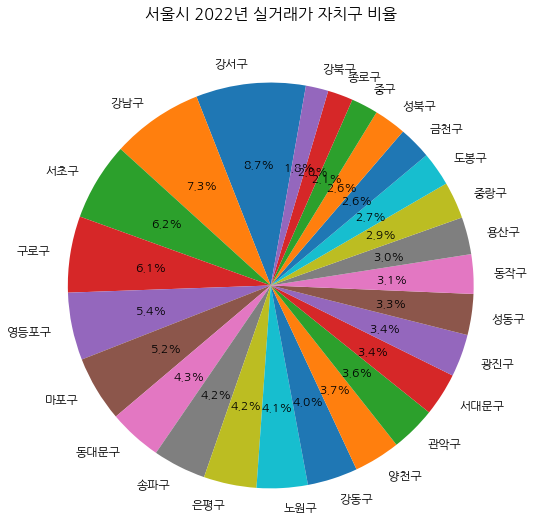

In [51]:
value_counts = map_actual['시군구'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=80)
plt.title('서울시 2022년 실거래가 자치구 비율', fontsize=16, y=1.1)
plt.rc('font', size=12)
plt.axis('equal')
plt.rc('font', family='NanumGothic')

plt.show()

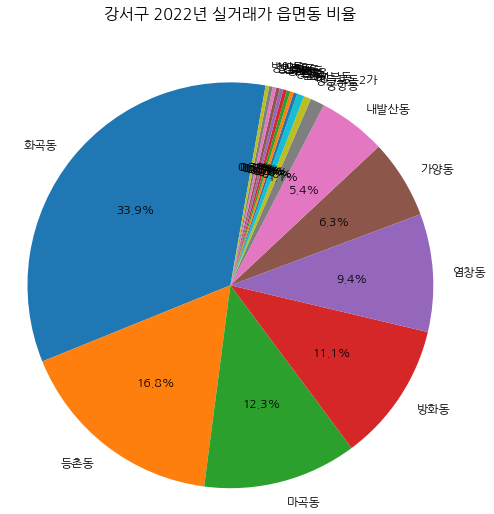

In [52]:
sigungu_name = '강서구'
gangbuk = map_actual[map_actual['시군구']==sigungu_name]

value_counts = gangbuk['읍면동'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=80)
plt.title(sigungu_name+' 2022년 실거래가 읍면동 비율', fontsize=16, y=1.1)
plt.rc('font', size=12)
plt.axis('equal')
plt.rc('font', family='NanumGothic')

plt.show()

In [54]:
map_actual[map_actual['시군구']=='강서구'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 526 to 876
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시군구             351 non-null    object 
 1   읍면동             351 non-null    object 
 2   complex_name    351 non-null    object 
 3   제곱미터당 실거래가(만원)  351 non-null    float64
dtypes: float64(1), object(3)
memory usage: 13.7+ KB


In [32]:
property_name

,접수년도,자치구코드,시군구,법정동코드,읍면동,지번구분코드,지번구분,본번,부번,층,계약일,전월세구분,임대면적,보증금(만원),임대료(만원),complex_name,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료,제곱미터당 보증금(만원),제곱미터당 임대료(만원),임대료/보증금*100
0,2022,11560,영등포구,12600,양평동2가,1.0,대지,1.0,3.0,6.0,20220101,전세,18.84,16000,0,힘멜하임,2014.0,오피스텔,22.01~24.01,신규,NaN,0.0,NaN,849.256900,0.000000,0.000
74,2022,11440,마포구,10200,공덕동,1.0,대지,43.0,0.0,14.0,20220101,월세,59.97,0,100,공덕2삼성래미안,2004.0,아파트,22.01~23.12,신규,NaN,0.0,0.0,0.000000,1.667500,NaN
76,2022,11680,강남구,10100,역삼동,1.0,대지,825.0,20.0,10.0,20220101,전세,24.61,29500,0,강남역 센트럴 푸르지오 시티,2015.0,오피스텔,22.01~23.01,신규,NaN,0.0,NaN,1198.699716,0.000000,0.000
78,2022,11440,마포구,12500,성산동,1.0,대지,50.0,10.0,6.0,20220101,월세,25.90,1000,45,골든빌오피스텔(50-10),2003.0,오피스텔,22.01~23.12,신규,NaN,0.0,0.0,38.610039,1.737452,4.500
80,2022,11740,강동구,10200,고덕동,1.0,대지,693.0,0.0,2.0,20220101,전세,59.79,36000,0,고덕그라시움,2019.0,아파트,NaN,NaN,NaN,NaN,NaN,602.107376,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560651,2023,11710,송파구,10700,가락동,1.0,대지,77.0,4.0,13.0,20221231,전세,39.49,23000,0,송파KCC웰츠타워,2011.0,오피스텔,23.01~25.01,신규,NaN,0.0,NaN,582.425931,0.000000,0.000
560653,2023,11710,송파구,10900,장지동,1.0,대지,844.0,0.0,14.0,20221231,전세,84.94,54000,0,송파파인타운7단지,2007.0,아파트,23.02~25.02,신규,NaN,0.0,NaN,635.742877,0.000000,0.000
560655,2023,11440,마포구,10300,신공덕동,1.0,대지,155.0,0.0,8.0,20221231,월세,84.90,40000,70,신공덕1차삼성래미안1아파트,2000.0,아파트,23.02~25.02,신규,NaN,0.0,0.0,471.142521,0.824499,0.175
560657,2023,11740,강동구,10200,고덕동,1.0,대지,277.0,5.0,2.0,20221231,전세,29.35,25000,0,스타캐슬2,2021.0,연립다세대,NaN,신규,NaN,0.0,NaN,851.788756,0.000000,0.000


In [24]:
property_name.isnull().sum()

접수년도                  0
자치구코드                 0
시군구                   0
법정동코드                 0
읍면동                   0
지번구분코드              262
지번구분                262
본번                   45
부번                   45
층                   217
계약일                   0
전월세구분                 0
임대면적                  0
보증금(만원)               0
임대료(만원)               0
complex_name          0
건축년도               2046
건물용도                  0
계약기간              99169
신규계약구분            89461
갱신청구권사용          336111
종전보증금             89462
종전임대료            271408
제곱미터당 월세(만원)          0
제곱미터당 보증금(만원)         0
월세/보증금*100          539
dtype: int64

In [51]:
floor2 = property_name.groupby(['시군구', '읍면동', 'complex_name', '층']).mean().reset_index()
map_monthly = floor2.groupby(['시군구', '읍면동', 'complex_name']).mean().reset_index()
map_monthly = map_monthly[['시군구', '읍면동', 'complex_name', '제곱미터당 임대료(만원)', '제곱미터당 보증금(만원)', '임대료/보증금*100']]
map_monthly

<ipython-input-51-73ea9e1ade73>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  floor2 = property_name.groupby(['시군구', '읍면동', 'complex_name', '층']).mean().reset_index()


,시군구,읍면동,complex_name,제곱미터당 임대료(만원),제곱미터당 보증금(만원),임대료/보증금*100
0,강남구,개포동,\t(157-9)\t,0.957265,512.820513,0.186667
1,강남구,개포동,(1163-4),0.000000,746.496039,0.000000
2,강남구,개포동,(1172-2),0.000000,830.367734,0.000000
3,강남구,개포동,(1183-12),0.000000,801.974090,0.000000
4,강남구,개포동,(1196-11),2.125966,113.849815,2.600000
...,...,...,...,...,...,...
57664,중랑구,중화동,화수분빌리지(104),0.000000,389.729482,0.000000
57665,중랑구,중화동,화인하우스,0.894393,13.209494,6.770833
57666,중랑구,중화동,휴렉스빌,0.835561,558.150513,0.166667
57667,중랑구,중화동,힐아트빌,0.000000,341.038272,0.000000


In [52]:
map = map_actual.merge(map_monthly, on=['시군구', '읍면동', 'complex_name'])
map

,시군구,읍면동,complex_name,층,거래가격,임대면적,세대수,건축연도,제곱미터당 실거래가(만원),제곱미터당 임대료(만원),제곱미터당 보증금(만원),임대료/보증금*100
0,강남구,개포동,개포6차우성아파트1동~8동,3.000000,2.190000e+09,79.97,NaN,NaN,2738.526948,0.481719,535.603672,0.271746
1,강남구,개포동,개포래미안포레스트,33.000000,2.400000e+09,84.83,11680.0,2020.0,2829.187787,1.769215,1026.504175,0.601490
2,강남구,개포동,개포자이(12-2),2.000000,2.460000e+09,168.42,NaN,NaN,1460.634129,0.446207,853.388423,0.122530
3,강남구,개포동,경남1,4.000000,3.430000e+09,123.28,NaN,NaN,2782.284231,0.226250,803.547546,0.067245
4,강남구,개포동,그린빌리지,4.000000,1.800000e+09,197.91,NaN,NaN,909.504320,0.000000,353.696125,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3379,중랑구,신내동,원당,3.500000,4.000000e+08,63.00,NaN,NaN,634.920635,0.317460,230.158730,0.222222
3380,중랑구,신내동,중앙하이츠,5.000000,6.850000e+08,84.97,NaN,NaN,806.166882,0.165862,401.200424,0.132602
3381,중랑구,중화동,범양프레체,12.333333,1.151111e+08,17.94,NaN,NaN,641.644989,1.900432,260.939242,3.265388
3382,중랑구,중화동,청광플러스원,11.000000,8.550000e+08,84.96,NaN,NaN,1006.355932,0.000000,658.131488,0.000000


In [54]:
map['임대수익'] = map['제곱미터당 임대료(만원)']*12
map['전세수익'] = map['제곱미터당 보증금(만원)']*0.048
map['순수익'] = map['임대수익']+map['전세수익']
map['Cap Rate'] = map['순수익']/map['제곱미터당 실거래가(만원)']*100
value_counts = map['읍면동'].value_counts()
map['count_dong'] = map['읍면동'].map(value_counts)
value_counts = map['시군구'].value_counts()
map['count_gu'] = map['시군구'].map(value_counts)
map

,시군구,읍면동,complex_name,층,거래가격,임대면적,세대수,건축연도,제곱미터당 실거래가(만원),제곱미터당 임대료(만원),제곱미터당 보증금(만원),임대료/보증금*100,임대수익,전세수익,순수익,Cap Rate,count_dong,count_gu
0,강남구,개포동,개포6차우성아파트1동~8동,3.000000,2.190000e+09,79.97,NaN,NaN,2738.526948,0.481719,535.603672,0.271746,5.780622,25.708976,31.489599,1.149874,12,232
1,강남구,개포동,개포래미안포레스트,33.000000,2.400000e+09,84.83,11680.0,2020.0,2829.187787,1.769215,1026.504175,0.601490,21.230577,49.272200,70.502778,2.491979,12,232
2,강남구,개포동,개포자이(12-2),2.000000,2.460000e+09,168.42,NaN,NaN,1460.634129,0.446207,853.388423,0.122530,5.354483,40.962644,46.317127,3.171029,12,232
3,강남구,개포동,경남1,4.000000,3.430000e+09,123.28,NaN,NaN,2782.284231,0.226250,803.547546,0.067245,2.714997,38.570282,41.285279,1.483863,12,232
4,강남구,개포동,그린빌리지,4.000000,1.800000e+09,197.91,NaN,NaN,909.504320,0.000000,353.696125,0.000000,0.000000,16.977414,16.977414,1.866667,12,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3379,중랑구,신내동,원당,3.500000,4.000000e+08,63.00,NaN,NaN,634.920635,0.317460,230.158730,0.222222,3.809524,11.047619,14.857143,2.340000,21,102
3380,중랑구,신내동,중앙하이츠,5.000000,6.850000e+08,84.97,NaN,NaN,806.166882,0.165862,401.200424,0.132602,1.990350,19.257620,21.247970,2.635679,21,102
3381,중랑구,중화동,범양프레체,12.333333,1.151111e+08,17.94,NaN,NaN,641.644989,1.900432,260.939242,3.265388,22.805184,12.525084,35.330268,5.506202,3,102
3382,중랑구,중화동,청광플러스원,11.000000,8.550000e+08,84.96,NaN,NaN,1006.355932,0.000000,658.131488,0.000000,0.000000,31.590311,31.590311,3.139079,3,102


<ipython-input-69-cacf6980fc19>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(map.corr().round(2), annot=True, cmap='YlGnBu')


<Axes: >

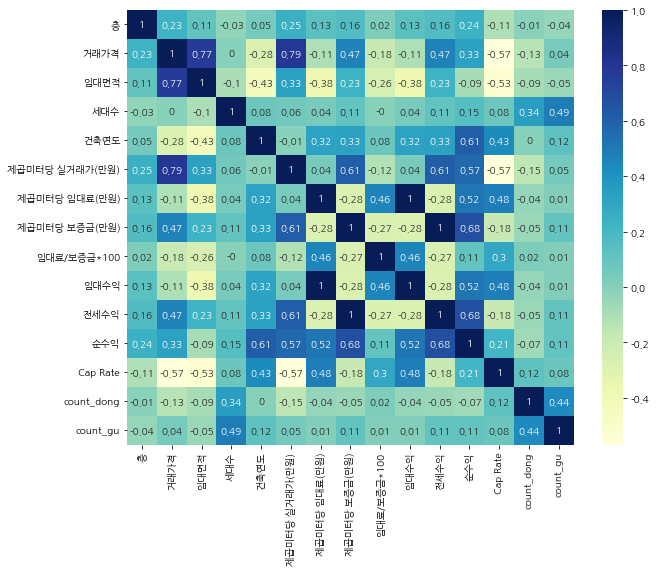

In [69]:
plt.figure(figsize=(10,8))
plt.rc('font', family='NanumGothic')
plt.rc("axes", unicode_minus = False)
sns.heatmap(map.corr().round(2), annot=True, cmap='YlGnBu')

<Axes: title={'center': '논현동 Cap Rate & 임대료/보증금 비 관계'}>

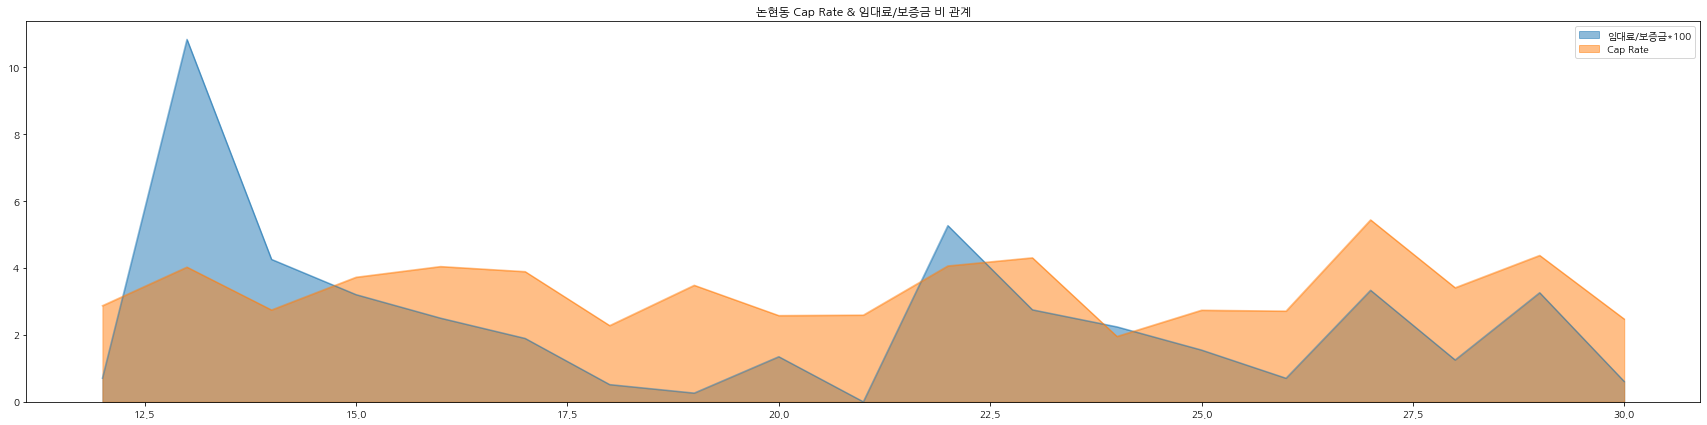

In [78]:
dong_list = map['읍면동'].unique().tolist()

k=1
dong_name = dong_list[k]
dong = map[map['읍면동']==dong_name]
dong.iloc[:, [11,15]].plot(kind='area', stacked=False, figsize=(30,7), title=dong_name+' Cap Rate & 임대료/보증금 비 관계')

<Axes: title={'center': '용산구 Cap Rate & 임대료/보증금 비 관계'}>

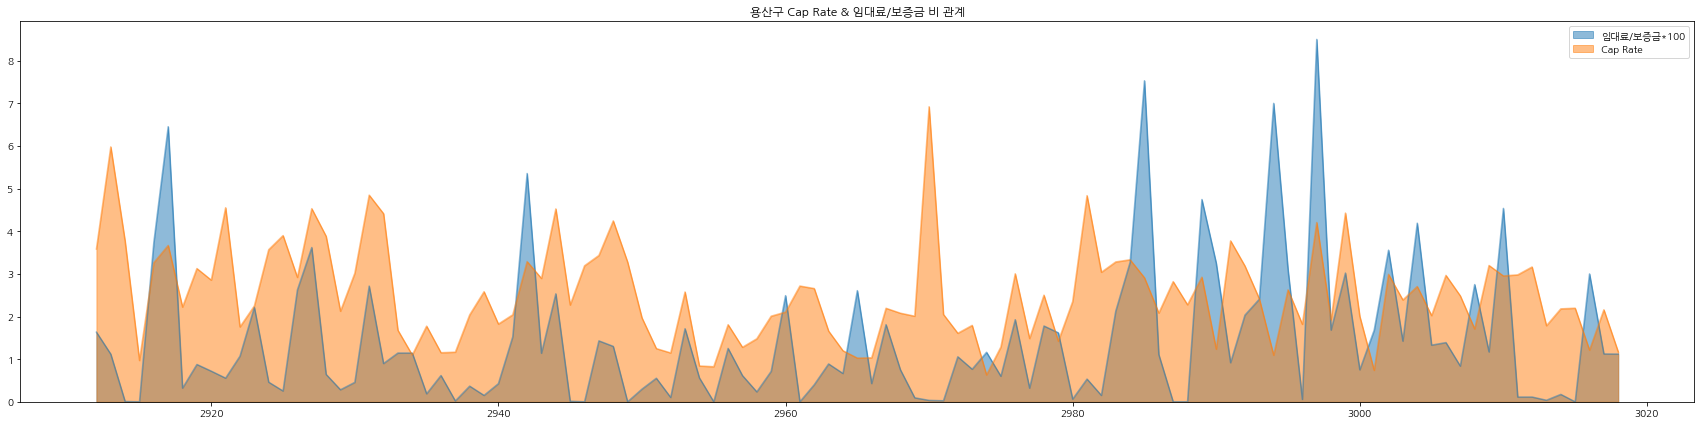

In [85]:
gu_list = map['시군구'].unique().tolist()

i=20
gu_name = gu_list[i]
gu = map[map['시군구']==gu_name]
gu.iloc[:, [11,15]].plot(kind='area', stacked=False, figsize=(30,7), title=gu_name+' Cap Rate & 임대료/보증금 비 관계')

<Axes: title={'center': '중구 Cap Rate & 임대료/보증금 비 관계'}>

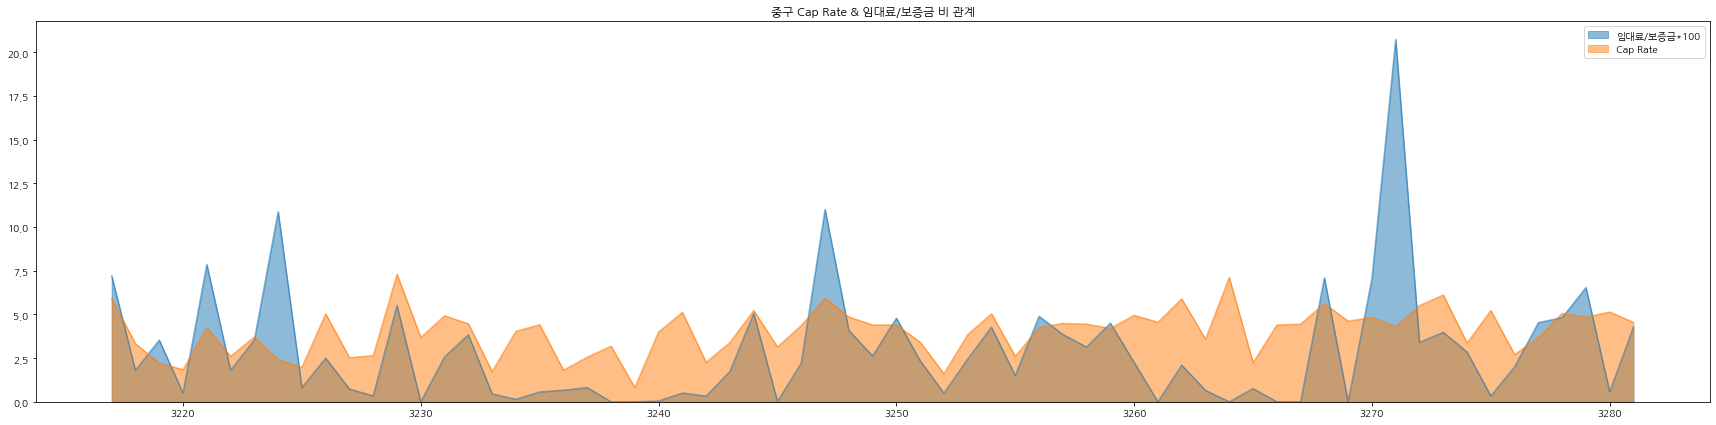

In [86]:
i=23
gu_name = gu_list[i]
gu = map[map['시군구']==gu_name]
gu.iloc[:, [11,15]].plot(kind='area', stacked=False, figsize=(30,7), title=gu_name+' Cap Rate & 임대료/보증금 비 관계')

In [81]:
gu_list

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

Text(0.5, 1.0, '서울시 2022년 Cap Rate 전체 분포 : 전월세전환율')

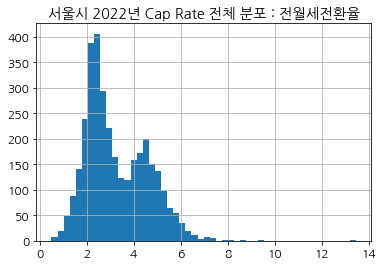

In [60]:
map['Cap Rate'].hist(bins=50)
plt.title('서울시 2022년 Cap Rate 전체 분포 : 전월세전환율')

In [95]:
df4 = pd.read_excel('/home/subin/다운로드/행정_법정동 중심좌표.xlsx')
df4 = df4[df4['코드종류']=='B']
df4.drop(['코드', '코드종류'], axis=1, inplace=True)
df4['리'] = df4['하위']
df4.drop(['하위', '리'], axis=1, inplace=True)
area_seoul = df4[df4['시도']=='서울특별시']
area_seoul = area_seoul[['시군구', '읍면동', '위도', '경도']].drop_duplicates()
area_seoul

,시군구,읍면동,위도,경도
3546,종로구,청운동,37.587111,126.969069
3547,종로구,신교동,37.583911,126.968354
3548,종로구,궁정동,37.584381,126.971489
3549,종로구,효자동,37.582416,126.971670
3550,종로구,창성동,37.580363,126.972065
...,...,...,...,...
4008,강동구,둔촌동,37.531157,127.142891
4009,강동구,암사동,37.552497,127.133010
4010,강동구,성내동,37.531338,127.129174
4011,강동구,천호동,37.543676,127.131748


In [115]:
map_ = map.merge(area_seoul, on=['시군구', '읍면동'], how='left')
map_

,시군구,읍면동,complex_name,층,거래가격,임대면적,세대수,건축연도,제곱미터당 실거래가(만원),제곱미터당 임대료(만원),제곱미터당 보증금(만원),임대료/보증금*100,임대수익,전세수익,순수익,Cap Rate,count_dong,count_gu,위도,경도
0,강남구,개포동,개포6차우성아파트1동~8동,3.000000,2.190000e+09,79.97,NaN,NaN,2738.526948,0.481719,535.603672,0.271746,5.780622,25.708976,31.489599,1.149874,12,232,37.478260,127.052024
1,강남구,개포동,개포래미안포레스트,33.000000,2.400000e+09,84.83,11680.0,2020.0,2829.187787,1.769215,1026.504175,0.601490,21.230577,49.272200,70.502778,2.491979,12,232,37.478260,127.052024
2,강남구,개포동,개포자이(12-2),2.000000,2.460000e+09,168.42,NaN,NaN,1460.634129,0.446207,853.388423,0.122530,5.354483,40.962644,46.317127,3.171029,12,232,37.478260,127.052024
3,강남구,개포동,경남1,4.000000,3.430000e+09,123.28,NaN,NaN,2782.284231,0.226250,803.547546,0.067245,2.714997,38.570282,41.285279,1.483863,12,232,37.478260,127.052024
4,강남구,개포동,그린빌리지,4.000000,1.800000e+09,197.91,NaN,NaN,909.504320,0.000000,353.696125,0.000000,0.000000,16.977414,16.977414,1.866667,12,232,37.478260,127.052024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3379,중랑구,신내동,원당,3.500000,4.000000e+08,63.00,NaN,NaN,634.920635,0.317460,230.158730,0.222222,3.809524,11.047619,14.857143,2.340000,21,102,37.607237,127.098924
3380,중랑구,신내동,중앙하이츠,5.000000,6.850000e+08,84.97,NaN,NaN,806.166882,0.165862,401.200424,0.132602,1.990350,19.257620,21.247970,2.635679,21,102,37.607237,127.098924
3381,중랑구,중화동,범양프레체,12.333333,1.151111e+08,17.94,NaN,NaN,641.644989,1.900432,260.939242,3.265388,22.805184,12.525084,35.330268,5.506202,3,102,37.599750,127.077718
3382,중랑구,중화동,청광플러스원,11.000000,8.550000e+08,84.96,NaN,NaN,1006.355932,0.000000,658.131488,0.000000,0.000000,31.590311,31.590311,3.139079,3,102,37.599750,127.077718


In [116]:
map_avg = map_.groupby(['읍면동']).mean().reset_index()
map_avg

<ipython-input-116-0db888188c3c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  map_avg = map_.groupby(['읍면동']).mean().reset_index()


,읍면동,층,거래가격,임대면적,세대수,건축연도,제곱미터당 실거래가(만원),제곱미터당 임대료(만원),제곱미터당 보증금(만원),임대료/보증금*100,임대수익,전세수익,순수익,Cap Rate,count_dong,count_gu,위도,경도
0,가락동,8.835165,1.052493e+09,79.378668,11710.0,2004.000000,1375.594959,0.531506,501.138804,0.840489,6.378076,24.054663,30.432739,2.762545,13.0,143.0,37.496486,127.126006
1,가리봉동,10.250000,3.332222e+08,45.781667,11530.0,2006.000000,688.524756,0.532738,331.783522,1.315394,6.392861,15.925609,22.318470,3.395202,2.0,209.0,37.482944,126.888062
2,가산동,7.827339,2.298277e+08,27.789011,11545.0,2014.666667,840.628300,0.957203,530.133014,2.273594,11.486432,25.446385,36.932816,4.510348,25.0,88.0,37.477598,126.888291
3,가양동,6.493182,5.021903e+08,44.029889,11500.0,2012.250000,1057.718732,0.697187,482.447756,1.590074,8.366241,23.157492,31.523733,3.675832,22.0,309.0,37.568238,126.845059
4,갈월동,11.000000,2.650000e+08,30.970000,11170.0,2004.000000,855.666774,0.592408,490.779240,1.633654,7.108895,23.557404,30.666299,3.583907,1.0,107.0,37.546267,126.972941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,효창동,9.666667,1.352333e+09,84.423333,11170.0,2006.000000,1601.487798,0.320804,686.923404,0.107304,3.849642,32.972323,36.821966,2.375970,3.0,107.0,37.543291,126.961214
302,후암동,2.000000,1.112500e+09,85.457500,11170.0,1980.000000,1332.649457,0.474209,339.234096,1.310549,5.690506,16.283237,21.973742,1.684198,4.0,107.0,37.549171,126.978938
303,휘경동,9.109524,5.027331e+08,45.183143,11230.0,2017.000000,1084.099531,1.560656,366.710749,3.033143,18.727878,17.602116,36.329994,3.547098,14.0,145.0,37.589592,127.061228
304,흑석동,6.523333,1.570167e+09,82.004367,11590.0,2009.000000,1911.840530,0.562231,622.081372,0.530228,6.746771,29.859906,36.606677,1.960438,10.0,106.0,37.505964,126.962578


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


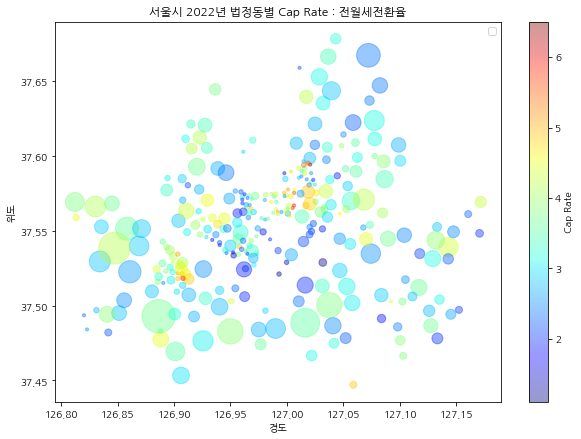

In [117]:
map_avg.plot(kind="scatter", x="경도", y="위도", alpha=0.4, figsize=(10,7), s=map_avg['count_dong']*10, c="Cap Rate", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.rc('font', family='NanumGothic')
plt.title('서울시 2022년 법정동별 Cap Rate : 전월세전환율')
plt.legend()
#plt.savefig('2018-2023 실거래가_강남3구·용산·성동 groupby 위도+경도_data_1.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


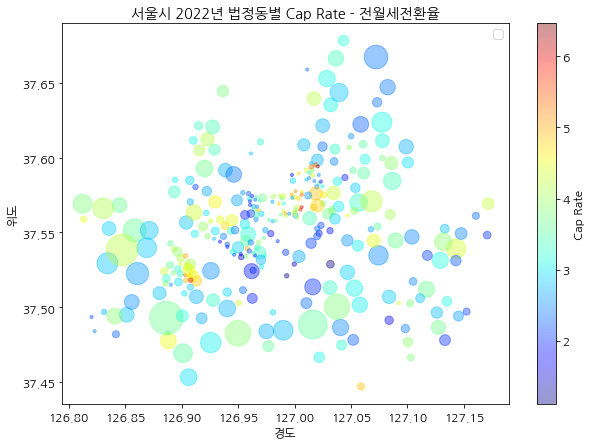

In [38]:
map_avg.plot(kind="scatter", x="경도", y="위도", alpha=0.4, figsize=(10,7), s=map_avg['count_dong']*10, c="Cap Rate", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.rc('font', family='NanumGothic')
plt.title('서울시 2022년 법정동별 Cap Rate : 전월세전환율')
plt.legend()
#plt.savefig('2018-2023 실거래가_강남3구·용산·성동 groupby 위도+경도_data_1.png')

<ipython-input-121-8f04e56f097a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  map_avg_gu = map_.groupby('시군구').mean().sort_values('Cap Rate', ascending=False).reset_index()


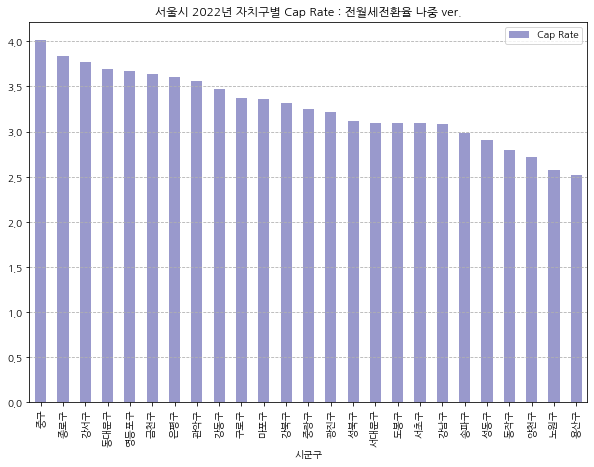

In [121]:
map_avg_gu = map_.groupby('시군구').mean().sort_values('Cap Rate', ascending=False).reset_index()
map_avg_gu.plot(kind="bar", x='시군구', y='Cap Rate', alpha=0.4, figsize=(10,7),  cmap=plt.get_cmap("jet"),sharex=False)
plt.rc('font', family='NanumGothic')
plt.title('서울시 2022년 자치구별 Cap Rate : 전월세전환율 나중 ver.')
plt.grid(True, axis='y', linestyle='--')
plt.legend()

<ipython-input-37-1b6cf5f67611>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  map_avg_gu = map_.groupby('시군구').mean().sort_values('Cap Rate', ascending=False).reset_index()


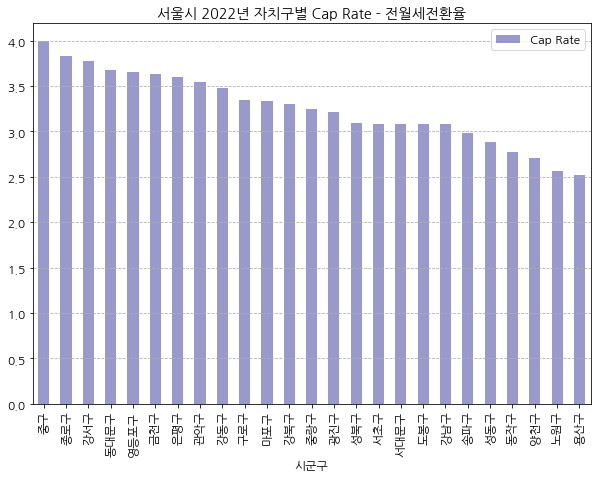

In [37]:
map_avg_gu = map_.groupby('시군구').mean().sort_values('Cap Rate', ascending=False).reset_index()
map_avg_gu.plot(kind="bar", x='시군구', y='Cap Rate', alpha=0.4, figsize=(10,7),  cmap=plt.get_cmap("jet"),sharex=False)
plt.rc('font', family='NanumGothic')
plt.title('서울시 2022년 자치구별 Cap Rate - 전월세전환율')
plt.grid(True, axis='y', linestyle='--')
plt.legend()


<ipython-input-136-2cb190e2333a>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  map_avg_gu = map_.groupby('시군구').mean().sort_values('Cap Rate', ascending=False).reset_index()


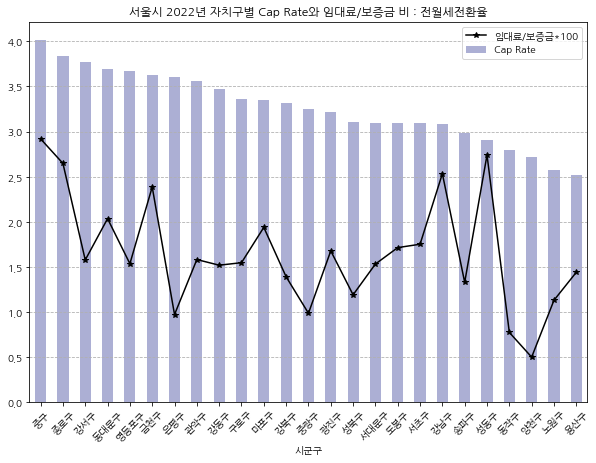

In [136]:
#map_avg_gu = map_.groupby('시군구').mean().sort_values('제곱미터당 실거래가(만원)', ascending=False).reset_index()
#map_avg_gu.plot(kind="bar", x='시군구', y='제곱미터당 실거래가(만원)', alpha=0.4, figsize=(10,7),  cmap=plt.get_cmap("jet"),sharex=False)
#plt.rc('font', family='NanumGothic')

#plt.grid(True, axis='y', linestyle='--')
#plt.legend()


# create bar graph
map_avg_gu = map_.groupby('시군구').mean().sort_values('Cap Rate', ascending=False).reset_index()
ax = map_avg_gu.plot(kind='bar', x='시군구', y='Cap Rate', color='#acafd4', figsize=(10,7))

# create line graph
#map_avg_gu['실거래가 비율'] = map_avg_gu['제곱미터당 실거래가(만원)']/500
map_avg_gu.plot(kind='line', x='시군구', y='임대료/보증금*100', color='black', marker='*', ax=ax)

#pd.set_option('display.float_format', lambda x: f'{x:,.0f}')
# set title and legend
plt.title('서울시 2022년 자치구별 Cap Rate와 임대료/보증금 비 : 전월세전환율')
plt.legend()
ax.xaxis.set_tick_params(rotation=45, labelsize=10)
ax.grid(True, axis='y', linestyle='--')


plt.show()


In [42]:
map

,시군구,읍면동,complex_name,제곱미터당 실거래가(만원),제곱미터당 월세(만원),제곱미터당 보증금(만원),월세/보증금*100,임대수익,전세수익,순수익,Cap Rate,count,count_gu
0,강남구,개포동,개포6차우성아파트1동~8동,2738.526948,0.338815,591.185490,0.180995,4.065784,28.376904,32.442687,1.184677,12,232
1,강남구,개포동,개포래미안포레스트,2829.187787,1.570695,1108.354785,0.524838,18.848340,53.201030,72.049370,2.546645,12,232
2,강남구,개포동,개포자이(12-2),1460.634129,0.361747,889.110414,0.094771,4.340960,42.677300,47.018260,3.219031,12,232
3,강남구,개포동,경남1,2782.284231,0.243978,778.762190,0.064951,2.927740,37.380585,40.308325,1.448749,12,232
4,강남구,개포동,그린빌리지,909.504320,0.000000,353.696125,0.000000,0.000000,16.977414,16.977414,1.866667,12,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3379,중랑구,신내동,원당,634.920635,0.317460,230.158730,0.222222,3.809524,11.047619,14.857143,2.340000,21,102
3380,중랑구,신내동,중앙하이츠,806.166882,0.165862,401.200424,0.132602,1.990350,19.257620,21.247970,2.635679,21,102
3381,중랑구,중화동,범양프레체,641.644989,1.900432,260.939242,3.265388,22.805184,12.525084,35.330268,5.506202,3,102
3382,중랑구,중화동,청광플러스원,1006.355932,0.000000,650.931438,0.000000,0.000000,31.244709,31.244709,3.104737,3,102


In [91]:
map2 = map.copy()
map2['현재가치'] = map2['제곱미터당 실거래가(만원)'] - map2['제곱미터당 보증금(만원)']
map2['Cap Rate'] = map2['임대수익']/map2['현재가치']*100 

map2

,시군구,읍면동,complex_name,층,거래가격,임대면적,세대수,건축연도,제곱미터당 실거래가(만원),제곱미터당 임대료(만원),제곱미터당 보증금(만원),임대료/보증금*100,임대수익,전세수익,순수익,Cap Rate,count_dong,count_gu,현재가치
0,강남구,개포동,개포6차우성아파트1동~8동,3.000000,2.190000e+09,79.97,NaN,NaN,2738.526948,0.481719,535.603672,0.271746,5.780622,25.708976,31.489599,0.262407,12,232,2202.923275
1,강남구,개포동,개포래미안포레스트,33.000000,2.400000e+09,84.83,11680.0,2020.0,2829.187787,1.769215,1026.504175,0.601490,21.230577,49.272200,70.502778,1.177721,12,232,1802.683612
2,강남구,개포동,개포자이(12-2),2.000000,2.460000e+09,168.42,NaN,NaN,1460.634129,0.446207,853.388423,0.122530,5.354483,40.962644,46.317127,0.881765,12,232,607.245706
3,강남구,개포동,경남1,4.000000,3.430000e+09,123.28,NaN,NaN,2782.284231,0.226250,803.547546,0.067245,2.714997,38.570282,41.285279,0.137209,12,232,1978.736685
4,강남구,개포동,그린빌리지,4.000000,1.800000e+09,197.91,NaN,NaN,909.504320,0.000000,353.696125,0.000000,0.000000,16.977414,16.977414,0.000000,12,232,555.808196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3379,중랑구,신내동,원당,3.500000,4.000000e+08,63.00,NaN,NaN,634.920635,0.317460,230.158730,0.222222,3.809524,11.047619,14.857143,0.941176,21,102,404.761905
3380,중랑구,신내동,중앙하이츠,5.000000,6.850000e+08,84.97,NaN,NaN,806.166882,0.165862,401.200424,0.132602,1.990350,19.257620,21.247970,0.491485,21,102,404.966459
3381,중랑구,중화동,범양프레체,12.333333,1.151111e+08,17.94,NaN,NaN,641.644989,1.900432,260.939242,3.265388,22.805184,12.525084,35.330268,5.990239,3,102,380.705748
3382,중랑구,중화동,청광플러스원,11.000000,8.550000e+08,84.96,NaN,NaN,1006.355932,0.000000,658.131488,0.000000,0.000000,31.590311,31.590311,0.000000,3,102,348.224444


Text(0.5, 1.0, '서울시 2022년 Cap Rate 전체 분포 : 1번 방식')

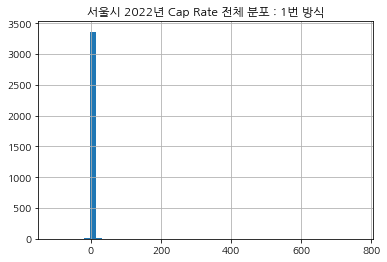

In [101]:
map2['Cap Rate'].hist(bins=50)
plt.title('서울시 2022년 Cap Rate 전체 분포 : 1번 방식')

Text(0.5, 1.0, '서울시 2022년 Cap Rate 중간 분포 : 1번 방식')

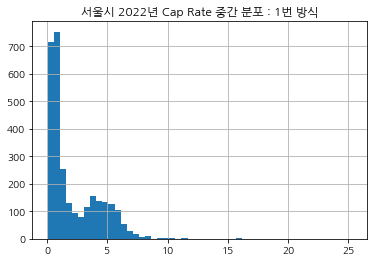

In [108]:
method1 = map2[(map2['Cap Rate'] < 50) & (map2['Cap Rate'] > 0)]
method1['Cap Rate'].hist(bins=50)
plt.title('서울시 2022년 Cap Rate 중간 분포 : 1번 방식')

<Axes: title={'center': '용산구 Cap Rate & 임대료/보증금 비 관계 : 1번 방식'}>

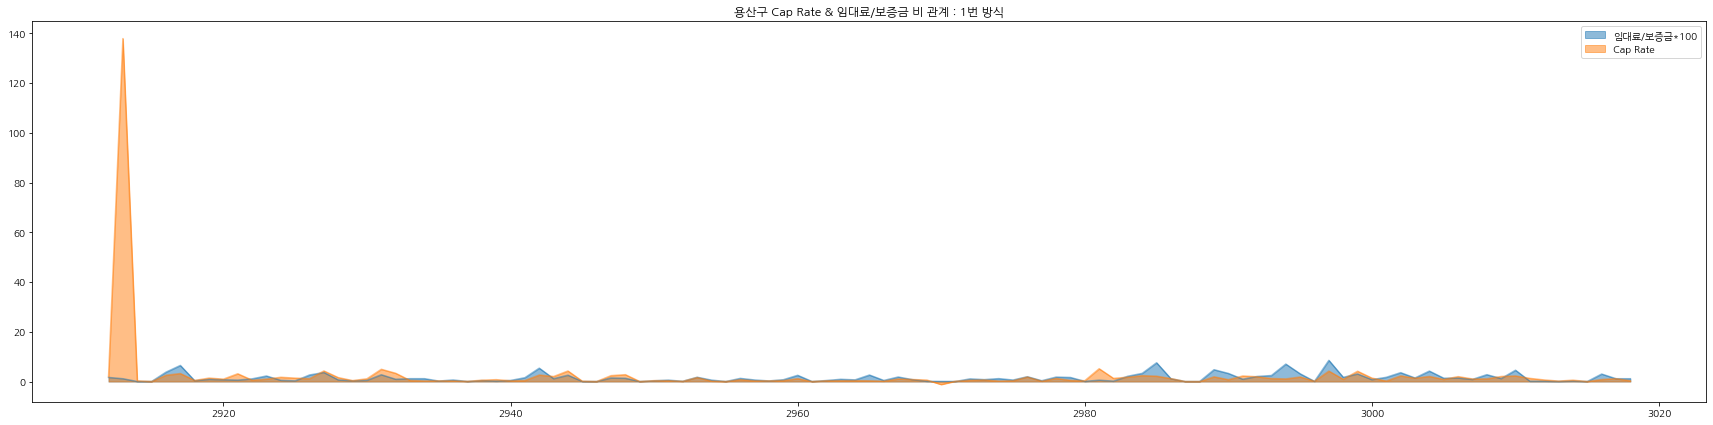

In [112]:
gu_list = map2['시군구'].unique().tolist()

i=20
gu_name = gu_list[i]
gu = map2[map2['시군구']==gu_name]
gu.iloc[:, [11,15]].plot(kind='area', stacked=False, figsize=(30,7), title=gu_name+' Cap Rate & 임대료/보증금 비 관계 : 1번 방식')



<Axes: title={'center': '용산구 Cap Rate & 임대료/보증금 비 관계 : 1번 방식, 극단값 제외'}>

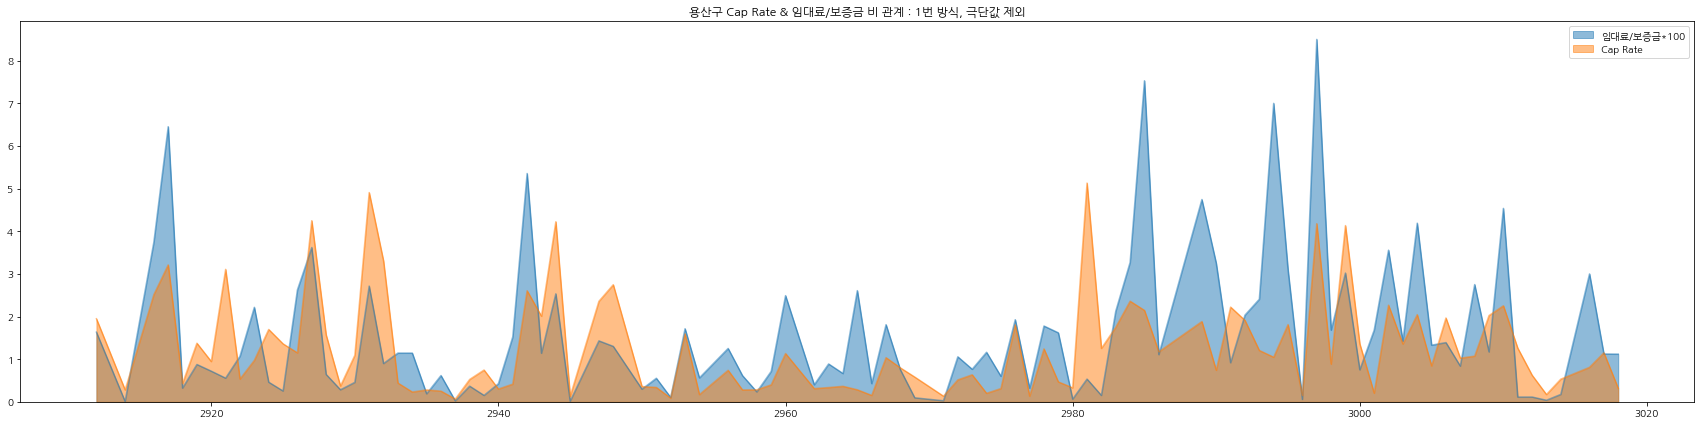

In [113]:
gu_list = method1['시군구'].unique().tolist()

i=20
gu_name = gu_list[i]
gu = method1[method1['시군구']==gu_name]
gu.iloc[:, [11,15]].plot(kind='area', stacked=False, figsize=(30,7), title=gu_name+' Cap Rate & 임대료/보증금 비 관계 : 1번 방식, 극단값 제외')

<ipython-input-103-e0841713bb4e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  map2_avg = map2_.groupby(['읍면동']).mean().reset_index()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


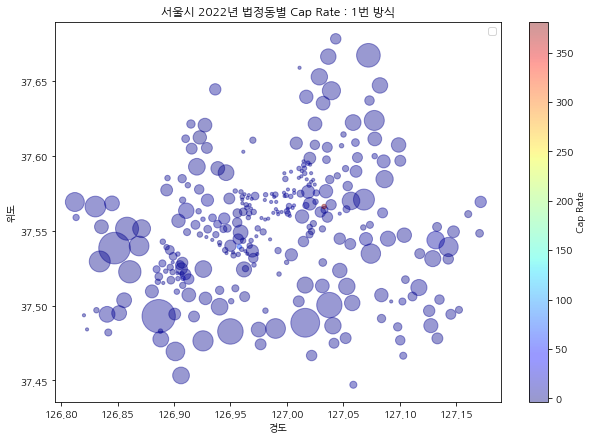

In [103]:
map2_ = map2.merge(area_seoul, on=['시군구', '읍면동'], how='left')
map2_avg = map2_.groupby(['읍면동']).mean().reset_index()
map2_avg.plot(kind="scatter", x="경도", y="위도", alpha=0.4, figsize=(10,7), s=map2_avg['count_dong']*10, c="Cap Rate", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.rc('font', family='NanumGothic')
plt.title('서울시 2022년 법정동별 Cap Rate : 1번 방식')
plt.legend()
#plt.savefig('2018-2023 실거래가_강남3구·용산·성동 groupby 위도+경도_data_1.png')

<ipython-input-110-a75913db4352>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  method1_avg = method1_.groupby(['읍면동']).mean().reset_index()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


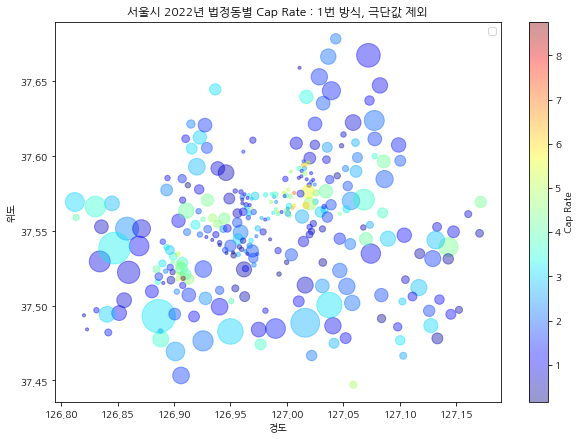

In [110]:
method1_ = method1.merge(area_seoul, on=['시군구', '읍면동'], how='left')
method1_avg = method1_.groupby(['읍면동']).mean().reset_index()
method1_avg.plot(kind="scatter", x="경도", y="위도", alpha=0.4, figsize=(10,7), s=method1_avg['count_dong']*10, c="Cap Rate", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.rc('font', family='NanumGothic')
plt.title('서울시 2022년 법정동별 Cap Rate : 1번 방식, 극단값 제외')
plt.legend()
#plt.savefig('2018-2023 실거래가_강남3구·용산·성동 groupby 위도+경도_data_1.png')jibun

<ipython-input-104-2bc247efb27d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  map2_avg_gu = map2_.groupby('시군구').mean().sort_values('Cap Rate', ascending=False).reset_index()


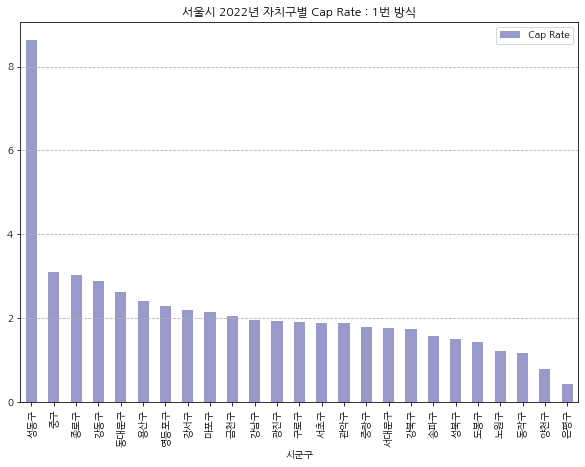

In [104]:
map2_avg_gu = map2_.groupby('시군구').mean().sort_values('Cap Rate', ascending=False).reset_index()
map2_avg_gu.plot(kind="bar", x='시군구', y='Cap Rate', alpha=0.4, figsize=(10,7),  cmap=plt.get_cmap("jet"),sharex=False)
plt.rc('font', family='NanumGothic')
plt.title('서울시 2022년 자치구별 Cap Rate : 1번 방식')
plt.grid(True, axis='y', linestyle='--')
plt.legend()

# 1번 방식으로 했다고 해서 강남3구가 다시 올라오는 것도 아님.

In [107]:
map2.describe()

# 전세가격이 매매가격과 거의 비슷할 때, 혹은 능가했을 때 음수나 지나치게 큰 숫자 등장

,층,거래가격,임대면적,세대수,건축연도,제곱미터당 실거래가(만원),제곱미터당 임대료(만원),제곱미터당 보증금(만원),임대료/보증금*100,임대수익,전세수익,순수익,Cap Rate,count_dong,count_gu,현재가치
count,3384.000000,3.384000e+03,3384.000000,1650.000000,1623.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000
mean,8.345482,7.970536e+08,62.817275,11446.281818,2007.645718,1157.891736,0.808905,493.787624,1.637965,9.706863,23.701806,33.408669,2.123282,30.060284,158.854019,664.104112
std,4.723509,7.594299e+08,36.772641,178.669895,10.011870,603.853192,0.831422,241.550924,3.862257,9.977067,11.594444,12.984722,13.761295,26.463868,64.796418,496.285002
min,-1.000000,5.016667e+07,12.033333,11110.000000,1961.000000,177.707182,0.000000,3.587778,0.000000,0.000000,0.172213,3.472222,-105.808065,1.000000,57.000000,-514.567608
25%,5.000000,2.450000e+08,29.960703,11290.000000,2003.000000,764.331210,0.238106,344.181845,0.149197,2.857278,16.520729,24.251484,0.384494,12.000000,108.000000,352.519570
50%,8.000000,6.037500e+08,59.950000,11500.000000,2006.000000,1021.139554,0.499258,472.453609,0.505437,5.991095,22.677773,31.166379,0.820301,22.000000,145.000000,550.407951
75%,11.000000,1.038750e+09,84.790000,11560.000000,2016.000000,1361.883507,1.212627,612.928804,2.264699,14.551528,29.420583,39.773374,3.402770,39.000000,190.000000,847.037904
max,47.500000,7.310000e+09,315.730000,11740.000000,2022.000000,4986.014836,5.789047,1796.429627,144.995668,69.468565,86.228622,122.340896,761.778275,111.000000,309.000000,4231.861272
